In [1]:
import numpy as np
from numpy import expand_dims

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img

import matplotlib.pyplot as plt

In [13]:
MobileNetV2 = tf.keras.models.load_model(
    'C:/MakeAIWork2/projects/apple_disease_classification/models/25', 
    custom_objects=None, 
    compile=True, 
    options=None
)

img_height = 256
img_width = 256
batch_size = 32

In [14]:
def confusionMatrix(model, 
                    img_height, 
                    img_width, 
                    test_data_dir = 'C:/MakeAIWork2/projects/apple_disease_classification/data/Test'
                    ):

    test_ds = tf.keras.utils.image_dataset_from_directory(
      test_data_dir,
      shuffle=False,
      image_size=(img_height, img_width),
      batch_size = batch_size
      )

    test_label = test_ds.class_names

    print(test_label)

  

    batchPredictions = model.predict(test_ds)

    predicted_categories = tf.argmax(batchPredictions, axis=1)

    true_categories = tf.concat([y for x, y in test_ds], axis=0)

    result_confusion_matrix = confusion_matrix(true_categories, predicted_categories)

    cm_display = ConfusionMatrixDisplay(confusion_matrix = result_confusion_matrix, display_labels = ['Blotch', 'Normal', 'Rot', 'Scab'])
    
    cm_display.plot()
    plt.show()
    
 

Found 120 files belonging to 4 classes.
['Blotch_Apple', 'Normal_Apple', 'Rot_Apple', 'Scab_Apple']


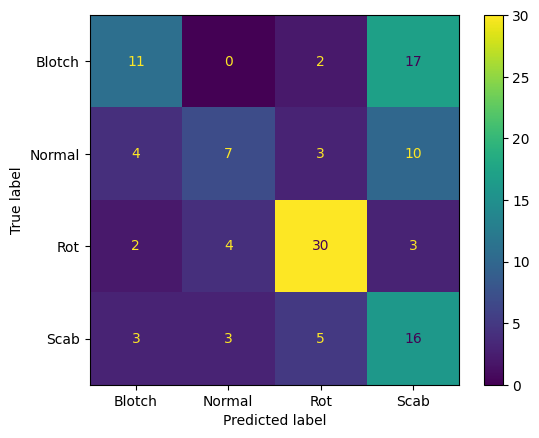

In [15]:
confusionMatrix(MobileNetV2, 256, 256)